In [1]:
from skimage import io, color, data, draw, exposure, feature, filters, measure, morphology, util, segmentation
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as sft
import scipy.signal as sps
from PIL import Image

In [2]:
%load_ext autoreload
%autoreload 2

from source import Helper
h = Helper()

## 1. Equilateral triangle

Load the sticker

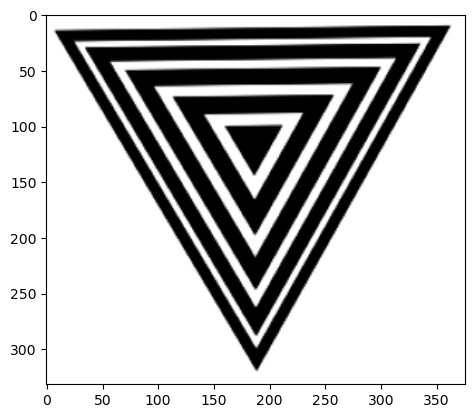

In [3]:
sticker = np.asarray(Image.open('Zeyi_Draft/triangle.png'))
plt.imshow(sticker, cmap="gray")
# Convert from rgba to gray
gray_sticker = color.rgba2rgb(sticker)
gray_sticker = color.rgb2gray(gray_sticker)

DFT of the sticker:

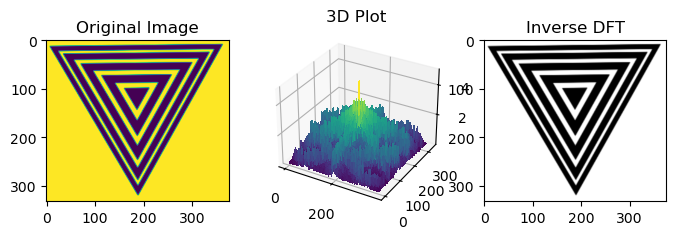

In [4]:
h.display_img(gray_sticker)

Choose a random frame from the video

(960, 1708)

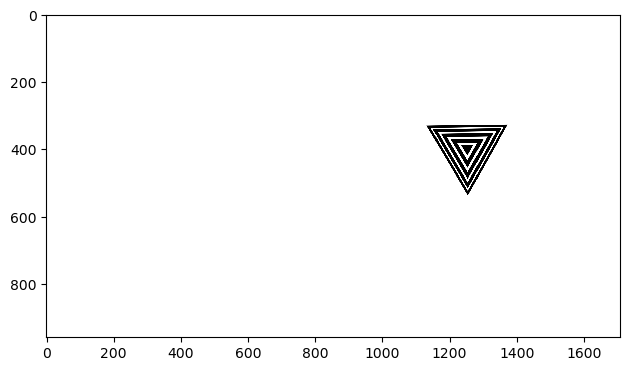

In [5]:
image = io.imread('Zeyi_Draft/test1.png', as_gray=True)
io.imshow(image)
image.shape

Create a 2-D spectrogram of the image

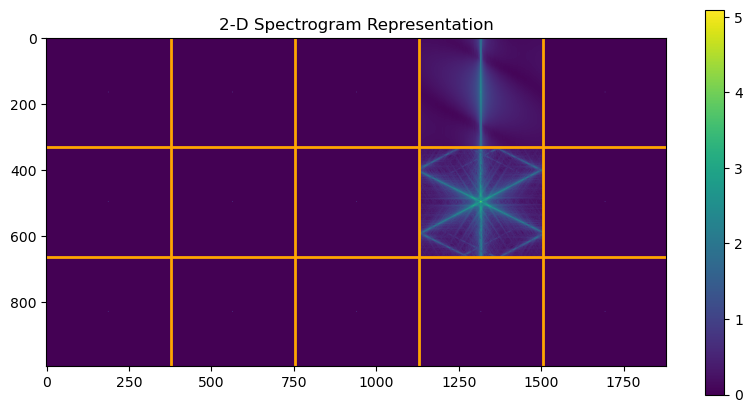

{'Composite DFT': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'Horizontal boxes': 5,
 'Vertical boxes': 3,
 'Box Height': 332,
 'Box Width': 376}

In [6]:
h.create_spectrogram(gray_sticker,image)

Use the Spectrogram to find out the location of the sticker

In [7]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(gray_sticker,image)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_mse)
print(sorted_box_idx)

Best Search Box: 9
Minimum value of MSE: 0.19468504233784487
[0.19468504 0.22369909 0.66818196 0.66818196 0.66818196 0.66818196
 0.66818196 0.66818196 0.66818196 0.66818196 0.66818196 0.66818196
 0.66818196 0.66818196 0.66818196]
[9, 4, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]


In [8]:
best_box, max_ssim, sorted_box_idx, sorted_ssim = h.find_location_ssim(gray_sticker,image)
print(f'Best Search Box: {best_box}')
print(f'Maximum value of SSIM: {max_ssim}')
print(sorted_ssim)
print(sorted_box_idx)

Best Search Box: 4
Maximum value of SSIM: 0.3887036276006206
[0.0215692  0.0215692  0.0215692  0.0215692  0.0215692  0.0215692
 0.0215692  0.0215692  0.0215692  0.0215692  0.0215692  0.0215692
 0.0215692  0.27163445 0.38870363]
[1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 9, 4]


When the image is in between the two boxes:

(960, 1708)


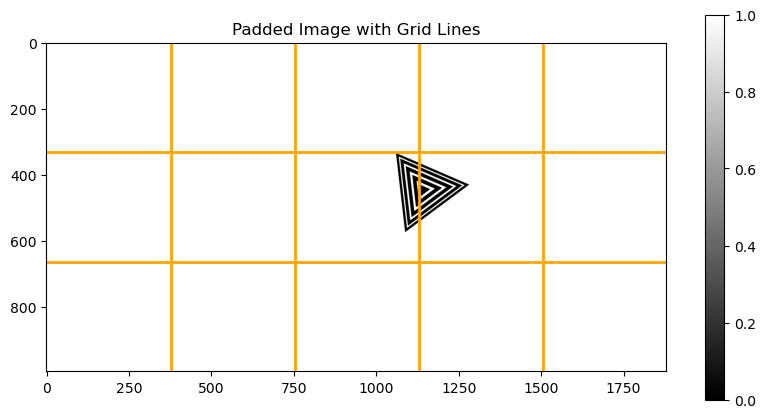

In [9]:
# Load the image
image2 = io.imread('Zeyi_Draft/test2.png', as_gray=True)
#plt.imshow(image2, cmap="gray")
print(image2.shape)
h.show_grid(gray_sticker, image2)

Plot the spectrogram:

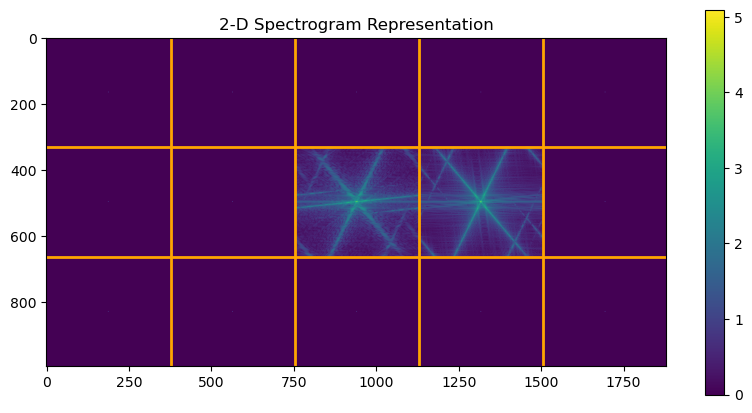

{'Composite DFT': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'Horizontal boxes': 5,
 'Vertical boxes': 3,
 'Box Height': 332,
 'Box Width': 376}

In [10]:
h.create_spectrogram(gray_sticker,image2)

Find the location:

In [11]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(gray_sticker,image2)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_box_idx)
print(sorted_mse)

Best Search Box: 8
Minimum value of MSE: 0.3359191792027657
[8, 9, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15]
[0.33591918 0.33643704 0.66818196 0.66818196 0.66818196 0.66818196
 0.66818196 0.66818196 0.66818196 0.66818196 0.66818196 0.66818196
 0.66818196 0.66818196 0.66818196]


In [12]:
best_box, max_ssim, sorted_box_idx, sorted_ssim = h.find_location_ssim(gray_sticker,image2)
print(f'Best Search Box: {best_box}')
print(f'Maximum value of SSIM: {max_ssim}')
print(sorted_ssim)
print(sorted_box_idx)

Best Search Box: 8
Maximum value of SSIM: 0.1984997071419692
[0.0215692  0.0215692  0.0215692  0.0215692  0.0215692  0.0215692
 0.0215692  0.0215692  0.0215692  0.0215692  0.0215692  0.0215692
 0.0215692  0.19361346 0.19849971]
[1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 9, 8]


## Triangle with noisy background

Load the image

(960, 1708)


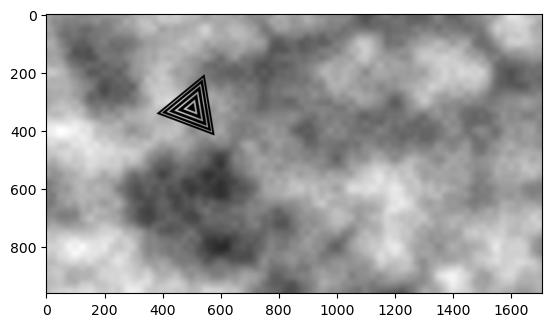

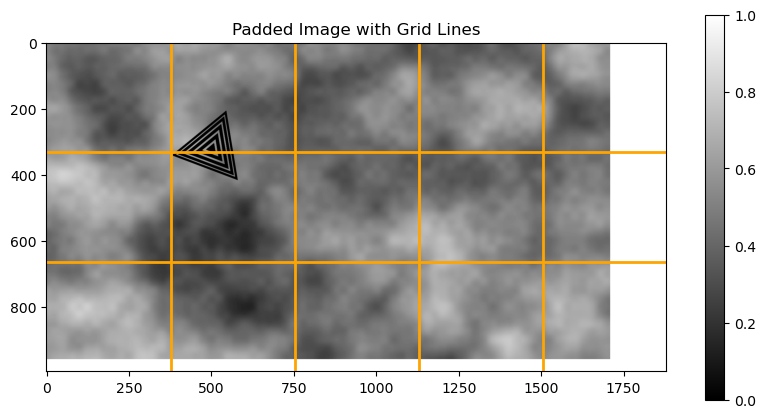

In [13]:
image3 = io.imread('Zeyi_Draft/test3.png', as_gray=True)
plt.imshow(image3, cmap="gray")
print(image3.shape)
h.show_grid(gray_sticker, image3)

Create spectrogram of the image

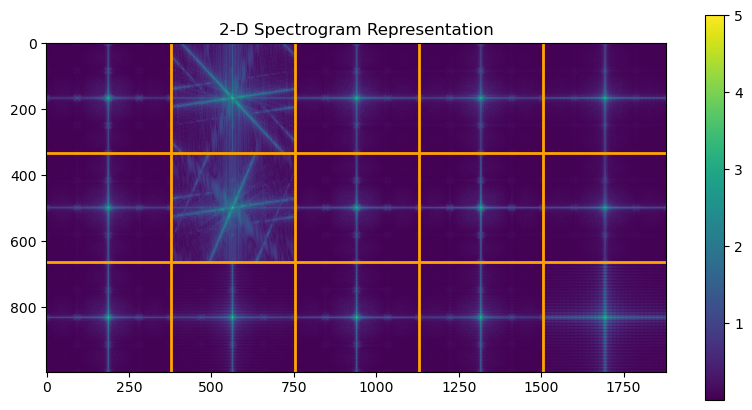

{'Composite DFT': array([[0.01997108, 0.05413528, 0.05083136, ..., 0.10897673, 0.06554923,
         0.03176281],
        [0.04551875, 0.0329823 , 0.02259339, ..., 0.10975436, 0.080508  ,
         0.12479018],
        [0.03365804, 0.00204344, 0.04047325, ..., 0.12373511, 0.11420774,
         0.05703646],
        ...,
        [0.01126009, 0.05441518, 0.06861439, ..., 0.13792759, 0.04640462,
         0.14286928],
        [0.03412727, 0.05991798, 0.11413959, ..., 0.17216682, 0.04144814,
         0.16482625],
        [0.04451734, 0.01408569, 0.04329615, ..., 0.04270798, 0.09404383,
         0.06353825]]),
 'Horizontal boxes': 5,
 'Vertical boxes': 3,
 'Box Height': 332,
 'Box Width': 376}

In [28]:
h.create_spectrogram(gray_sticker,image3, show = True)

Find the location of the sticker

In [15]:
best_box, min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(gray_sticker,image3)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_mse)
print(sorted_box_idx)


Best Search Box: 7
Minimum value of MSE: 0.22969897112790896
[0.22969897 0.24355343 0.30087037 0.37337531 0.39806222 0.40038912
 0.40250065 0.40338619 0.41604833 0.42040486 0.43279719 0.43620555
 0.43695415 0.43735583 0.43939014]
[7, 2, 15, 12, 3, 4, 6, 14, 5, 11, 13, 10, 8, 1, 9]


In [16]:
best_box, max_ssim, sorted_box_idx, sorted_ssim = h.find_location_ssim(gray_sticker,image3)
print(f'Best Search Box: {best_box}')
print(f'Maximum value of SSIM: {max_ssim}')
print(sorted_ssim)
print(sorted_box_idx)

Best Search Box: 15
Maximum value of SSIM: 0.2748510806783566
[0.15776656 0.15790769 0.16160803 0.16282395 0.1688581  0.173302
 0.1843355  0.18570611 0.18667666 0.18899074 0.19286689 0.21712528
 0.23339452 0.23576056 0.27485108]
[1, 9, 8, 13, 10, 11, 5, 3, 14, 6, 4, 12, 7, 2, 15]


### Right Triangle

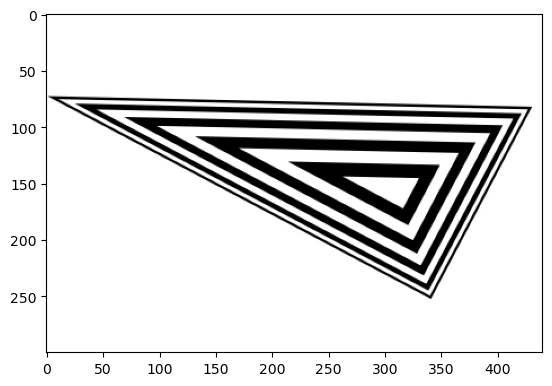

In [17]:
sticker4 = io.imread("rotating_30_60_90_chirps_video/vid_30_60_90_chirp_sticker-53.png")
sticker4 = sticker4[250:550,130:570]
plt.imshow(sticker4, cmap="gray")
sticker4 = color.rgba2rgb(sticker4)
sticker4 = color.rgb2gray(sticker4)

(800, 1600)


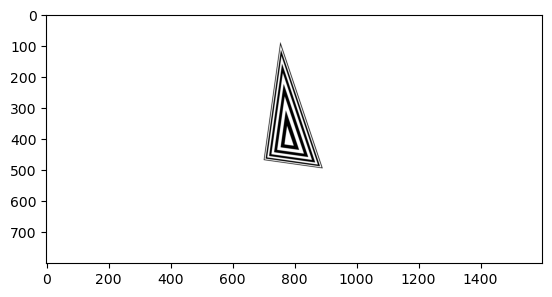

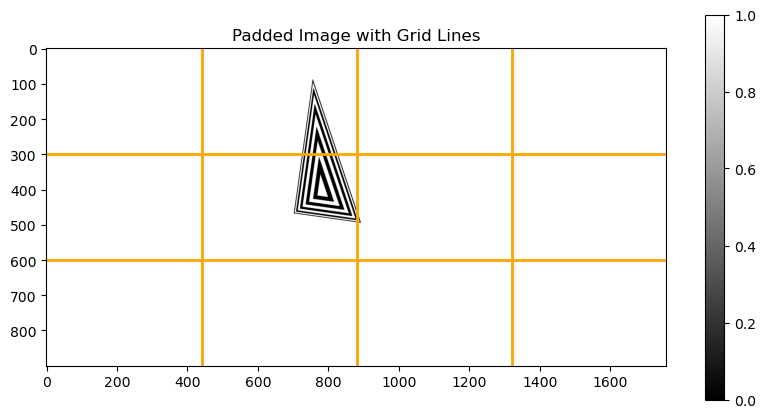

In [19]:
image4 = io.imread("rotating_30_60_90_chirps_video/vid_30_60_90_chirp_sticker-2.png")
image4 = color.rgba2rgb(image4)
image4 = color.rgb2gray(image4)
plt.imshow(image4, cmap="gray")
print(image4.shape)
h.show_grid(sticker4, image4)


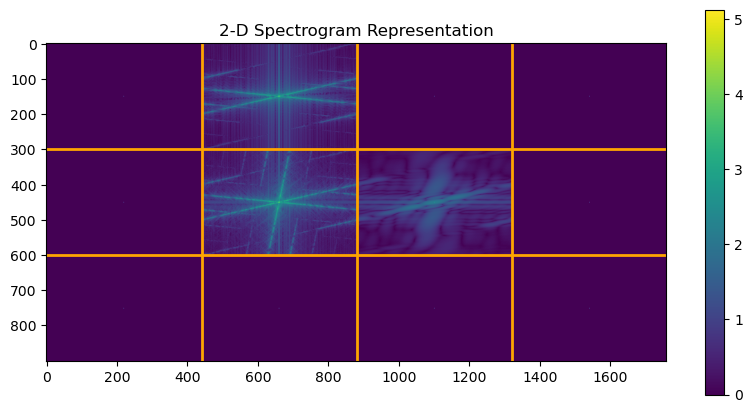

{'Composite DFT': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'Horizontal boxes': 4,
 'Vertical boxes': 3,
 'Box Height': 300,
 'Box Width': 440}

In [20]:
h.create_spectrogram(sticker4,image4, show = True)

In [21]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker4,image4)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_box_idx)
print(sorted_mse)

Best Search Box: 2
Minimum value of MSE: 0.3155441808048617
[2, 7, 6, 1, 3, 4, 5, 8, 9, 10, 11, 12]
[0.31554418 0.31896115 0.32672691 0.83794152 0.83794152 0.83794152
 0.83794152 0.83794152 0.83794152 0.83794152 0.83794152 0.83794152]


## Changing Background

(720, 1200)


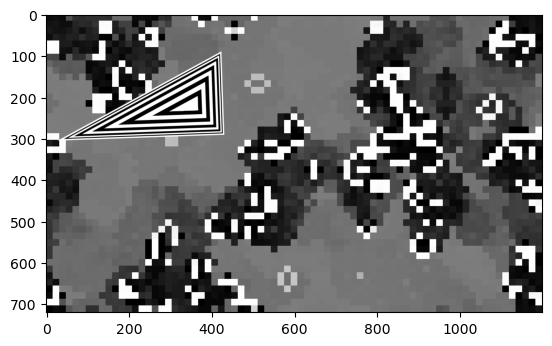

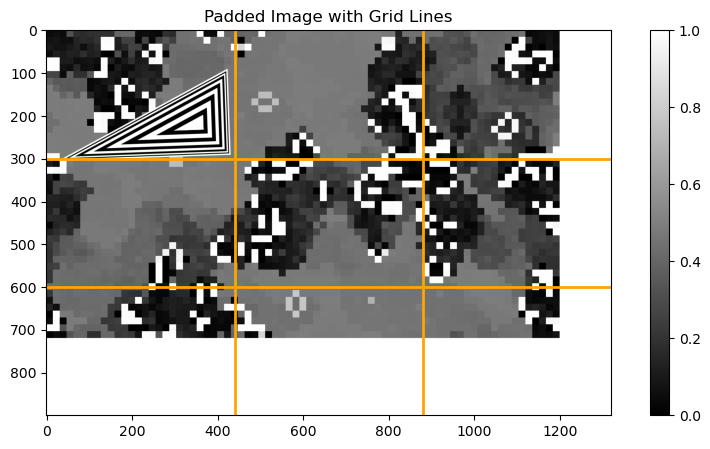

In [22]:
image5 = io.imread("gol_background_30_60_90_vid/vid_30_60_90_gol-9.png")
image5 = color.rgba2rgb(image5)
image5 = color.rgb2gray(image5)
plt.imshow(image5, cmap="gray")
print(image5.shape)
h.show_grid(sticker4, image5)

Create spectrogram

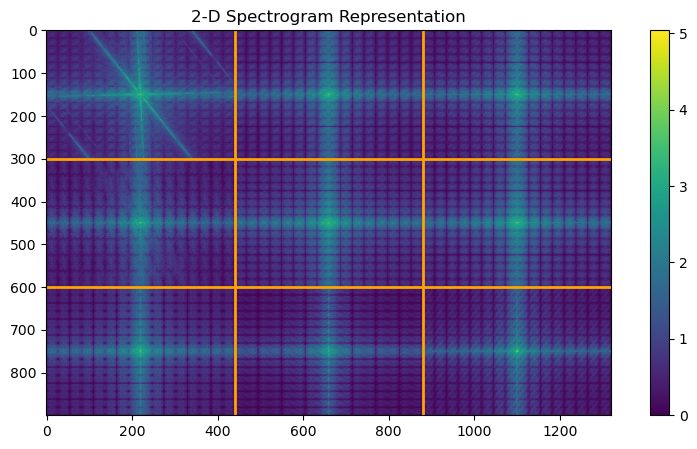

{'Composite DFT': array([[3.67246265e-01, 3.78815474e-01, 2.68925980e-01, ...,
         9.64327467e-17, 9.64327467e-17, 3.85730987e-16],
        [2.66496025e-01, 1.09193387e-01, 1.72345280e-01, ...,
         2.24657883e-01, 5.91106794e-02, 6.05369796e-02],
        [2.28561191e-01, 2.27684421e-01, 1.16815842e-02, ...,
         9.57827962e-02, 1.68020260e-01, 1.11325198e-01],
        ...,
        [0.00000000e+00, 8.45481930e-02, 1.23026688e-01, ...,
         6.75202487e-02, 1.41908945e-01, 5.24806810e-02],
        [0.00000000e+00, 1.39044206e-01, 1.53680724e-01, ...,
         1.39331415e-01, 1.52576590e-01, 1.08316730e-01],
        [0.00000000e+00, 9.00696633e-02, 7.12409527e-02, ...,
         1.64885188e-01, 2.25483151e-01, 1.43929847e-01]]),
 'Horizontal boxes': 3,
 'Vertical boxes': 3,
 'Box Height': 300,
 'Box Width': 440}

In [27]:
h.create_spectrogram(sticker4,image5, show = True)

Find the location of the sticker

In [113]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker4,image5)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_box_idx)
print(sorted_mse)

Best Search Box: 9
Minimum value of MSE: 0.2795109765374013
[9, 4, 7, 8, 2, 3, 5, 6, 1]
[0.27951098 0.2797102  0.29243417 0.29370149 0.30857328 0.31288949
 0.33733396 0.34619583 0.36995817]
